In [1]:
import numpy as np
import PIL 
from PIL import Image, ImageDraw
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

In [2]:
#pip install opencv-python 

In [3]:
#!pip install ultralytics 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV files

In [5]:
df1 = pd.read_csv("labels_train.csv")
df1.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [6]:
df2 = pd.read_csv("labels_trainval.csv")
df2.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [7]:
df3 = pd.read_csv("labels_val.csv")
df3.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478899046136829030.jpg,201,206,129,135,5
1,1478899046136829030.jpg,203,210,150,158,1
2,1478899046136829030.jpg,215,219,130,135,5
3,1478899046136829030.jpg,222,234,145,162,1
4,1478899046136829030.jpg,223,235,149,160,1


# Checking Null Values

In [8]:
df1.isnull().sum()

frame       0
xmin        0
xmax        0
ymin        0
ymax        0
class_id    0
dtype: int64

In [9]:
df2.isnull().sum()

frame       0
xmin        0
xmax        0
ymin        0
ymax        0
class_id    0
dtype: int64

In [10]:
df3.isnull().sum()

frame       0
xmin        0
xmax        0
ymin        0
ymax        0
class_id    0
dtype: int64

# Exploratory Data Analysis

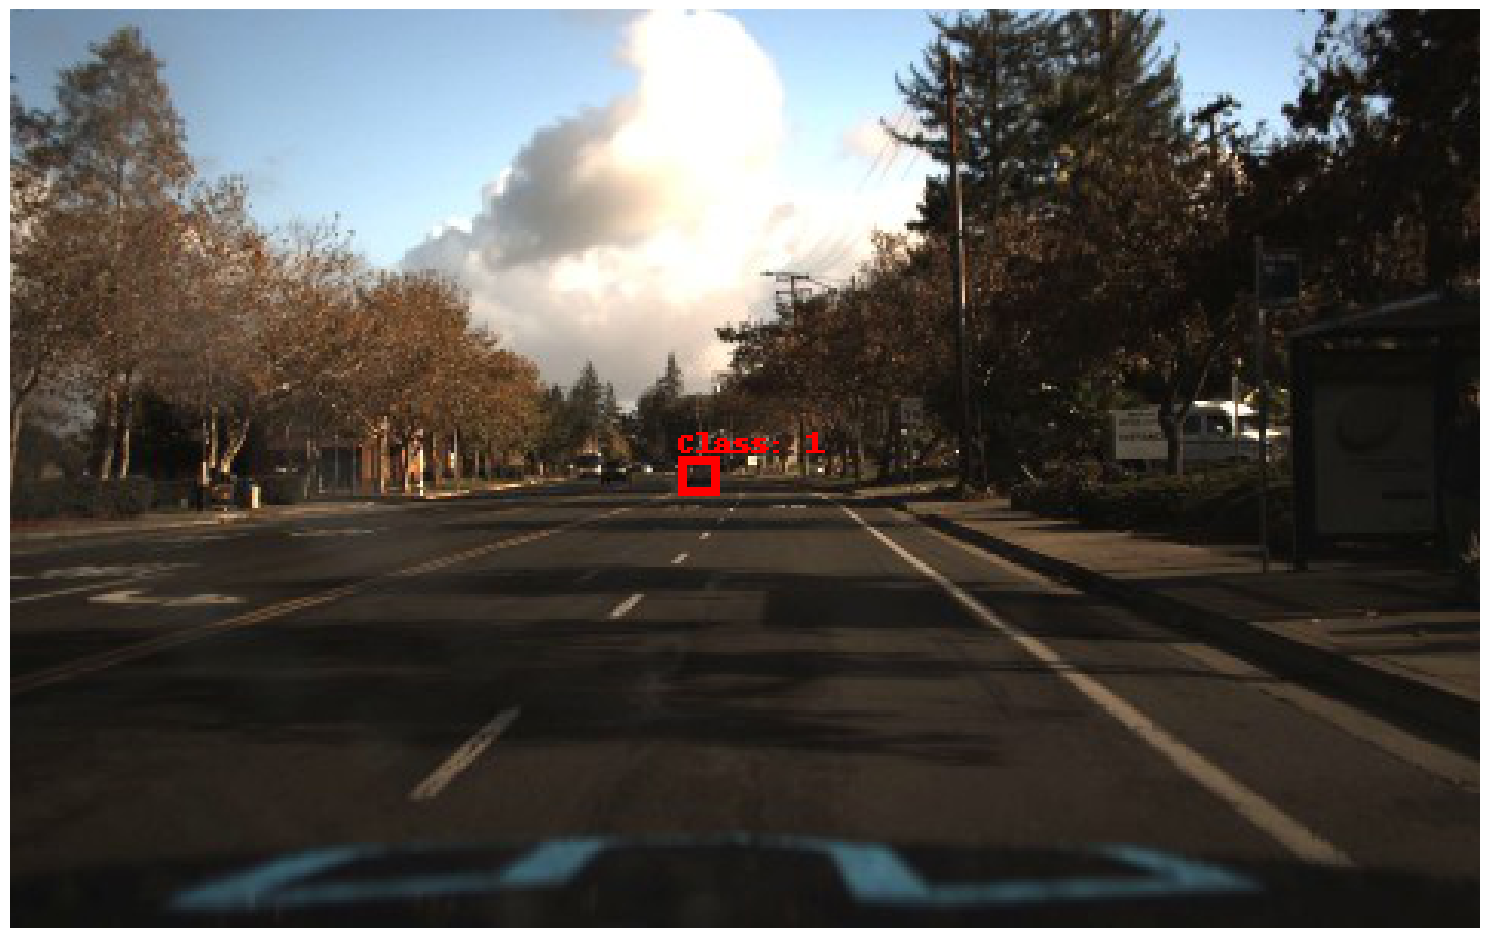

In [11]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt

image_path = 'C:/My Workspace/images'

# Visualize bounding boxes
plt.figure(figsize=(15, 10))

# Set the desired range of images to display (2 to 3)
start_index = 2
end_index = 3

for i, row in df1.iterrows():
    # Break out of the loop if the desired range is reached
    if i + 1 > end_index:
        break
    if i + 1 < start_index:
        continue
    
    image_file = row['frame']
    image = Image.open(os.path.join(image_path, image_file))  
    
    draw = ImageDraw.Draw(image)
    
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    class_id = row['class_id']
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=3)
    draw.text((xmin, ymin - 10), f'Class: {class_id}', fill='red')
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()

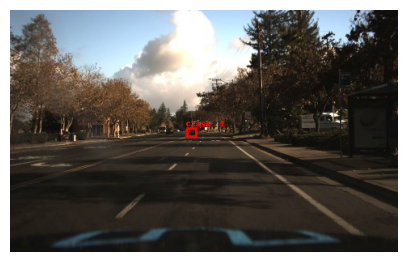

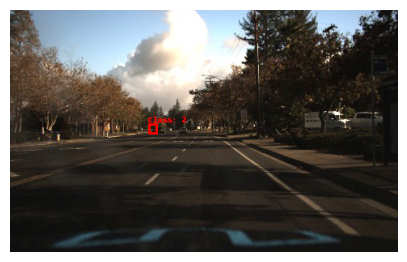

In [12]:
# Set the desired range of images to display (3 to 4)
start_index = 3
end_index = 4

for i, row in df1.iterrows():
    # Break out of the loop if the desired range is reached
    if i + 1 > end_index:
        break
    
    # Continue to the next iteration if the current index is less than the starting index
    if i + 1 < start_index:
        continue
    
    image_file = row['frame']
    image = Image.open(os.path.join(image_path, image_file))  
    
    draw = ImageDraw.Draw(image)
    
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    class_id = row['class_id']
    
    # Draw bounding box
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=3)
    
    # Annotate with class_id
    draw.text((xmin, ymin - 10), f'Class: {class_id}', fill='red')
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')

plt.show()

# Applying YOLOv8 model

In [13]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

# Loading Images 

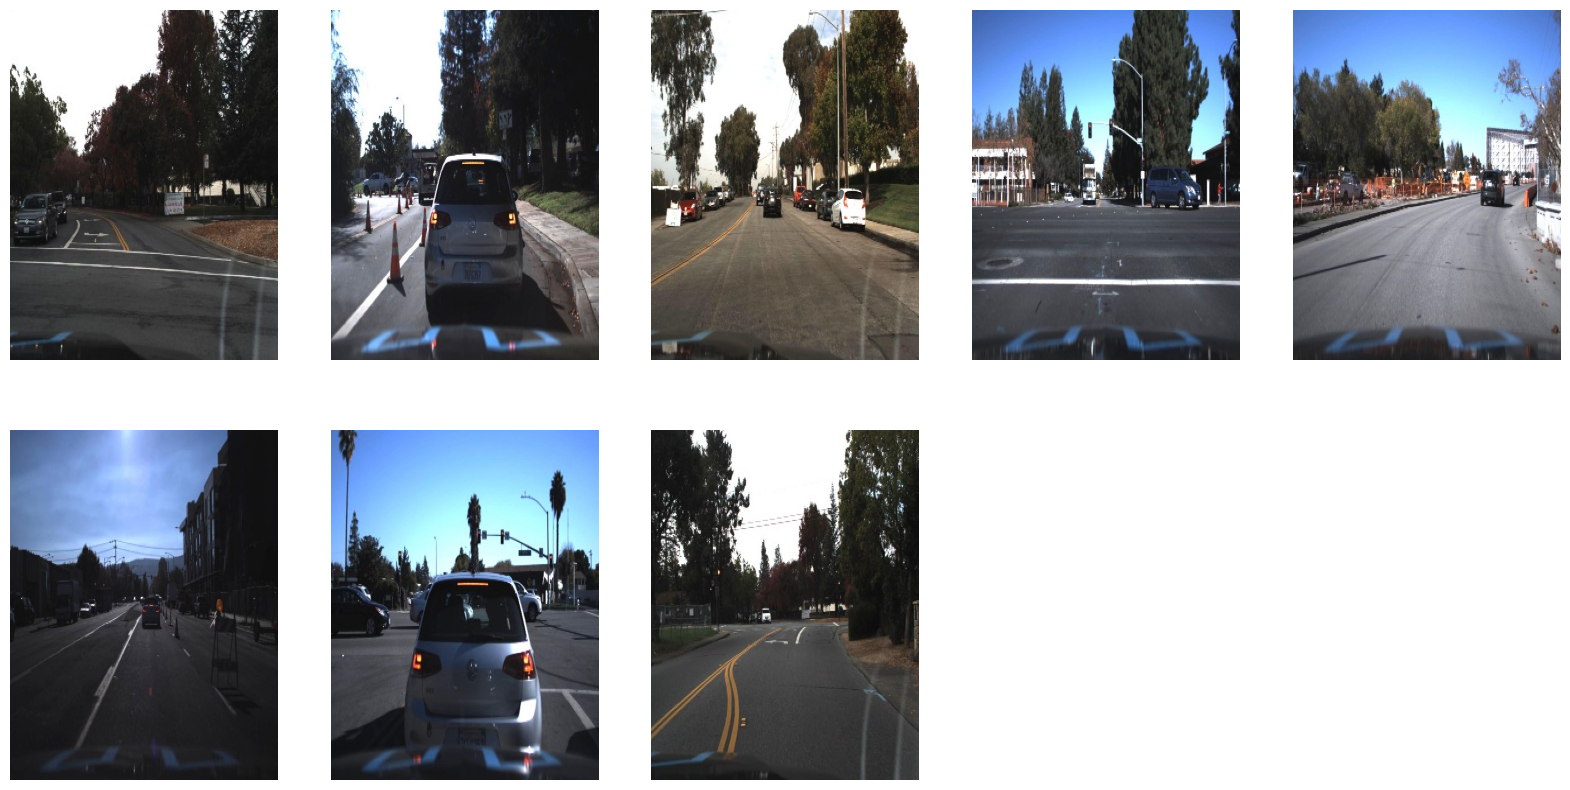

In [14]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt

root_path = 'C:/My Workspace/images'
num_samples = 8
min_num_samples = 8
max_num_samples = 10


images_data = glob.glob(os.path.join(root_path, '*.jpg'))
random_images = random.sample(images_data, num_samples)
if num_samples < min_num_samples or num_samples > max_num_samples:
    print(f"Warning: num_samples ({num_samples}) is not within the desired range of {min_num_samples} to {max_num_samples}. Adjusting num_samples.")
    num_samples = min(max(num_samples, min_num_samples), max_num_samples)

if num_samples > len(images_data):
    print(f"Warning: num_samples ({num_samples}) is greater than the number of available images ({len(images_data)}). Adjusting num_samples.")
    num_samples = len(images_data)

plt.figure(figsize=(20, 10)) 
for i in range(num_samples):
    plt.subplot(2, max_num_samples // 2, i + 1)
    image = cv2.imread(random_images[i])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto', extent=(0, image.shape[1], 0, image.shape[0]))
    
    plt.axis('off')

plt.show()


# Finding Coordinates and Confidence of each object

In [15]:
images = []

for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_images[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
    images.append(output.plot()[:, :, ::-1])  


image 1/1 C:\My Workspace\images\1478900339536934249.jpg: 416x640 3 cars, 520.5ms
Speed: 4.3ms preprocess, 520.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [73.66687774658203, 154.94398498535156, 102.48461151123047, 183.57945251464844]
Confidence is: 0.69
-------
Object 2 is: car
Coordinates are: [5.337764739990234, 157.0259552001953, 85.80377960205078, 202.20960998535156]
Confidence is: 0.66
-------
Object 3 is: car
Coordinates are: [99.81978607177734, 157.7399139404297, 111.41995239257812, 166.80148315429688]
Confidence is: 0.33
-------

image 1/1 C:\My Workspace\images\1479500264593468520.jpg: 416x640 3 cars, 1 truck, 491.0ms
Speed: 2.4ms preprocess, 491.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [166.25253295898438, 122.2140884399414, 345.9905090332031, 267.983154296875]
Confidence is: 0.93
-------
Object 2 is: car
Coordinates are: [56.58488845825195, 139.134323120

# Detecting the objects



-------------------------------------- Images after object detection with YOLOv8 --------------------------------


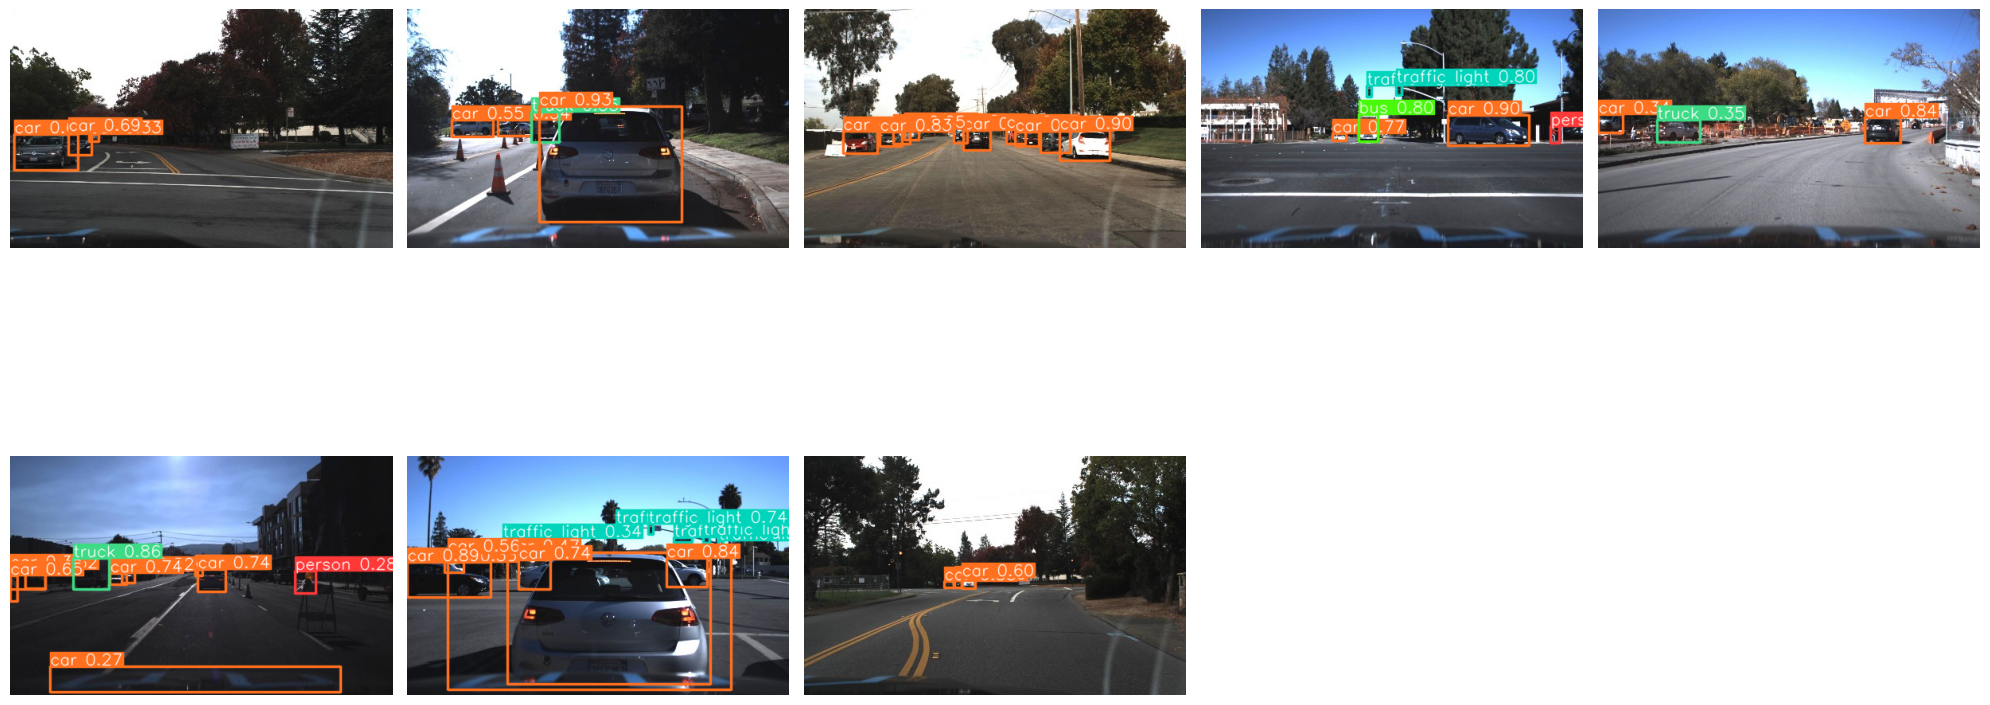

In [16]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOv8 --------------------------------')    

plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    plt.subplot(2, max_num_samples // 2, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()